# Zadanie 10.2 Statystyka

#### importujemy niezbędne biblioteki

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Dzięki bibliotece numpy generujemy pseudolosowe rozkłady normalne zgodnie z trescią zadania.

In [2]:
small_data_set = np.random.normal(loc = 3, scale = 1, size = 100)
large_data_set = np.random.normal(loc = 3, scale = 1, size = 10000)

#### Przy tej samej liczbie przedziałów dla histogramu oba wykresy bedą się znacznie różnic miedzy sobą. Histogram dla 100 danych będzie w mniejszym stopniu przypominał rozkład normalny ze względu na stosunkowo małą liczbę danych. Będzie również mniej prawdopodobne by wystąpiły na nim outlinery. Wraz ze zwiększaniem ilości danych prawdopodobieństwo wystąpienia outilnerów będzie wzrastać. 

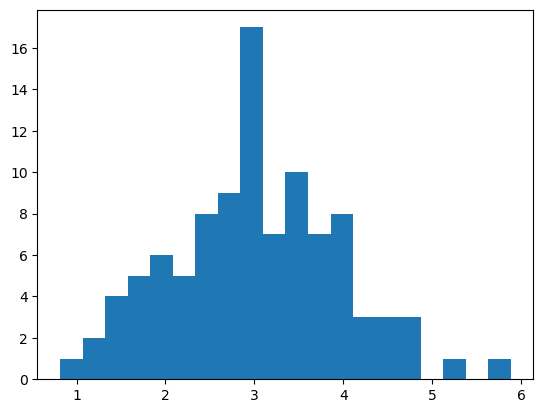

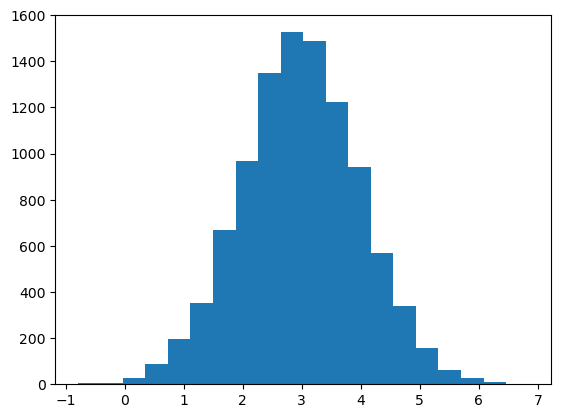

In [3]:
plt.hist(small_data_set, bins=20)
plt.show()
plt.hist(large_data_set, bins=20)
plt.show()

#### dla średniej nie widac większej róznicy dla tak wygenerowanych danych, aczkolwiek w przypadku kilkukrotnego powtórzenia generowania danych pseudolosowych możnaby spodziewać się że średnia będzie bliżej wartości 3 dla zestawu 10000 danych. Średnia dla zestawu 100 danych bedzie bardziej podatna na wpływ wartości ekstremalnych

In [4]:
mean_smallds = np.mean(small_data_set)
print(mean_smallds)
mean_largeds = np.mean(large_data_set)
print(mean_largeds)

3.022742237996868
2.9864934774946383


#### Mediana jest porównywalna dla onu zestawu danych

In [5]:
median_smallds = np.median(small_data_set)
print(median_smallds)
median_largeds = np.median(large_data_set)
print(median_largeds)

3.002843879133515
2.974925722463934


#### Liczenie mody mnie ma większego sensu gdy generujemy dane pseudolosowe typu float. Count prawie zawsze bedzie = 1. W bardzo rzadkich przypadkach może się zdarzyć że count bedzie większe.

In [6]:
mode_smallds = stats.mode(small_data_set)
print(mode_smallds)
mode_largeds = stats.mode(large_data_set)
print(mode_largeds)

ModeResult(mode=0.8133392589276638, count=1)
ModeResult(mode=-0.792346808769973, count=1)


#### Dla kwartyli róznica bedzie widoczna szczególnie przy Q1 oraz Q4 w związku z faktem że większe prawdopodobieństwo wystąpienia ekstremalnych wartosci będzie występowało dla bardziej licznego zbioru danych.. 

In [7]:
q0s = np.quantile(small_data_set, 0.0)
q1s = np.round(np.quantile(small_data_set, 0.25))
q3s = np.round(np.quantile(small_data_set, 0.75))
q4s = np.round(np.quantile(small_data_set, 1.0))
print(f'Q0-small: {q0s}')
print(f'Q1-small: {q1s}')
print(f'Q2-small: {median_smallds}')
print(f'Q3-small: {q3s}')
print(f'Q4-small: {q4s}')

q0l = np.quantile(large_data_set, 0.0)
q1l = np.round(np.quantile(large_data_set, 0.25))
q3l = np.round(np.quantile(large_data_set, 0.75))
q4l = np.round(np.quantile(large_data_set, 1.0))
print(f'Q0-large: {q0l}')
print(f'Q1-large: {q1l}')
print(f'Q2-large: {median_largeds}')
print(f'Q3-large: {q3l}')
print(f'Q4-large: {q4l}')

Q0-small: 0.8133392589276638
Q1-small: 2.0
Q2-small: 3.002843879133515
Q3-small: 4.0
Q4-small: 6.0
Q0-large: -0.792346808769973
Q1-large: 2.0
Q2-large: 2.974925722463934
Q3-large: 4.0
Q4-large: 7.0


#### Na wykresach widać wpływ wielkości zbioru danych na prawdopodobieństwo wystąpienia ekstremalnych wartości. Najlepiej obrazują to linie oznaczające wartości max. 

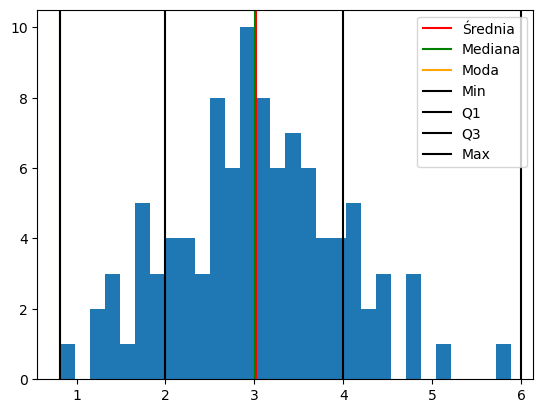

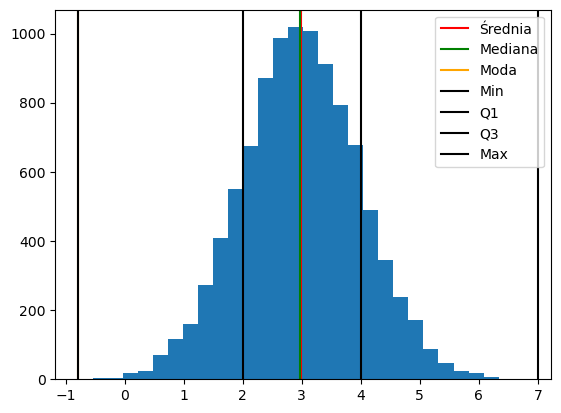

In [8]:
plt.hist(small_data_set, bins=30)
plt.axvline(x = mean_smallds, color='red', label = 'Średnia')
plt.axvline(x = median_smallds, color='green', label = 'Mediana')
plt.axvline(x = mode_smallds[0], color='orange', label = 'Moda')
plt.axvline(x = q0s, color='black', label = 'Min')
plt.axvline(x = q1s, color='black', label = 'Q1')
plt.axvline(x = q3s, color='black', label = 'Q3')
plt.axvline(x = q4s, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()
plt.hist(large_data_set, bins=30)
plt.axvline(x = mean_largeds, color='red', label = 'Średnia')
plt.axvline(x = median_largeds, color='green', label = 'Mediana')
plt.axvline(x = mode_largeds[0], color='orange', label = 'Moda')
plt.axvline(x = q0l, color='black', label = 'Min')
plt.axvline(x = q1l, color='black', label = 'Q1')
plt.axvline(x = q3l, color='black', label = 'Q3')
plt.axvline(x = q4l, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

#### Również dla zakresu danych spodziewamy się że dane w ilości 10000 będą miały większy zakres niż dane w ilości 100

In [9]:
range_smallds = max(small_data_set) - min(small_data_set)
print(range_smallds)
range_largeds = max(large_data_set) - min(large_data_set)
print(range_largeds)

5.073151591707669
7.636348492246577


#### Rozstęp miedzykwartylowy odnosi się do środkowej częsci rozkładu, więc nie powinno być to dużych różnic. 

In [10]:
iqrs = q3s - q1s
print(iqrs)
iqrl = q3l - q1l
print(iqrl)

2.0
2.0


#### Boxploty bardzo dobrze ilustrują prawdopodobieństwo pojawienia się outlinerów dla każdej z grup danych. Im więcej danych tym większe prawdopodobieństwo pojawienia się outlinerów. 

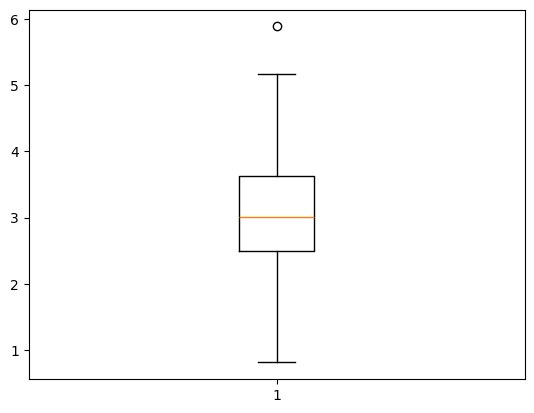

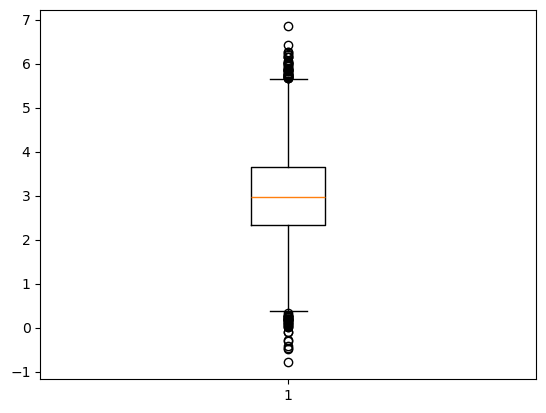

In [34]:
plt.boxplot(small_data_set)
plt.show()
plt.boxplot(large_data_set)
plt.show()

#### Ocena wariancji sprowadza się do tego samego co ocena odchylenia standardowego poniżej

In [12]:
variance_smallds = np.var(small_data_set, ddof=1)
print(variance_smallds)
variance_largeds = np.var(large_data_set, ddof=1)
print(variance_largeds)

0.8990880261507525
0.9934120593190574


#### im bardziej dane oddalone są od średniej tym większe jest odchylenie standardowe. W przypadku gdy mamy wiecej danych większe jest prawdopodobieństwo pojawienia się danych ekstremalnych co zarazem wpływa na zwiększenie odchylenia standardowego. 

In [13]:
standard_deviation_smallds = np.std(small_data_set, ddof=1)
print(standard_deviation_smallds)
standard_deviation_largeds = np.std(large_data_set, ddof=1)
print(standard_deviation_largeds)

0.9482025238053063
0.9967005865951205
